In [1]:
import torch
from torch import nn,optim
from torchvision import datasets,transforms
from torch.utils.data import Dataset,DataLoader
from keras.datasets import mnist
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the MNIST dataset
(train_x,train_y),(test_x,test_y) = mnist.load_data()
train_x = train_x.reshape(60000,784)
test_x = test_x.reshape(10000,784)

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# Create dataset class by inheriting the Dataset module from torch.utils.data

class Data(Dataset):
    def __init__(self,X,Y):
        super(Data,self).__init__()
        self.X = torch.tensor(X,dtype=torch.float)
        self.Y = torch.tensor(Y,dtype=torch.long)

    def __getitem__(self,i):
        return self.X[i],self.Y[i]
    
    def __len__(self):
        return len(self.X)

In [4]:
# Create the neural network from scratch by inheriting torch.nn.Module

class Net(nn.Module):
    def __init__(self,layers):
        super(Net,self).__init__()
        self.linear = nn.ModuleList(layers)
        self.criterion = nn.CrossEntropyLoss()

    def forward(self,x):
        for layer in self.linear:
            x = layer(x)

        return x

In [5]:
def train(model,epochs,train_loader):
    global loss_hist
    for n in range(epochs):
        for x,y in train_loader.dataset:
            yhat = model.forward(x)

            # Increase dimensions to use cross entropy loss
            yhat = torch.unsqueeze(yhat,0)
            y = torch.unsqueeze(y,0)

            # Calculate the loss and propagate the error backwards
            loss = model.criterion(yhat,y)
            loss.backward()
            loss_hist.append(loss)

            # Take a gradient descent step with the optimization algorithm
            optimizer.step()
            optimizer.zero_grad()

In [56]:
def calcAccuracy(model,dataset,m):
    acc = 0
    for x,y in dataset:
        yhat = model(x)
        if torch.argmax(yhat) == y:
            acc += 1

    return acc / m * 100

In [43]:
def showImg(tensor):
    plt.imshow(tensor.reshape(28,28))

In [14]:
lr = 1e-4
model = Net([
    nn.Linear(784,70),
    nn.Tanh(),
    nn.Linear(70,10)
])

optimizer = optim.Adam(model.parameters(),lr)
loss_hist = []

In [35]:
train_data = Data(train_x,train_y)
test_data = Data(test_x,test_y)

# Create batches with the DataLoader module from torch.utils.data
test_loader = DataLoader(test_data,batch_size=100)
train_loader = DataLoader(train_data,batch_size=50)

In [36]:
# Train the model
train(model,5,train_loader)

In [57]:
# Calculate model accuracy
print(f'Train accuracy: {calcAccuracy(model,train_loader.dataset,60000)}%')
print(f'Test accuracy: {calcAccuracy(model,test_loader.dataset,10000)}%')

Train accuracy: 93.29166666666666%
Test accuracy: 93.28999999999999%


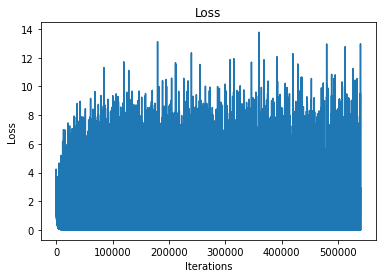

In [42]:
# Plot the loss

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss')
plt.plot(loss_hist)
plt.show()

Let's try to make a prediction with the trained model:

In [ ]:
x_,y_ = train_loader.dataset[2]

Label predicted (Yhat): 4

Expected prediction (Y): 



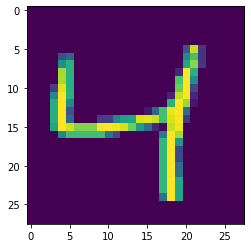

In [53]:
print(f"Label predicted (Yhat): {torch.argmax(model(x_))}\n")
print("Expected prediction (Y): \n")
showImg(x_)